**Import the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv(r'C:\Users\LEGION\OneDrive\Documents\Naresh IT\Datafiles\Visadataset.csv')
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Bi variate analysis**

- Analyse two variables
- Two categorical column
- Two numerical column
- One categorical and one numerical

**Categorical Vs Categorical**

In [3]:
visa_df.select_dtypes(include="object").columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
visa_df.select_dtypes(exclude="object").columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**continent - case_status**

In [5]:
visa_df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

**How many Asia people got the visa Certified ?**

**How many Asia people got the visa Denied ?**

In [7]:
con1 = visa_df['continent'] == "Asia"
con2 = visa_df['case_status'] == "Certified"
conCertified = con1 & con2
print(f"The number of employees visa certified are {len(visa_df[conCertified])}")

The number of employees visa certified are 11012


In [8]:
con1 = visa_df['continent'] == "Asia"
con3 = visa_df['case_status'] == "Denied"
conDenied = con1 & con3
print(f"The number of employees visa denied are {len(visa_df[conDenied])}")

The number of employees visa denied are 5849


In [9]:
for value in visa_df['continent'].value_counts().index:
    con1 = visa_df['continent'] == value
    con2 = visa_df['case_status'] == "Certified"
    con = con1 & con2
    print(f"The number of employees from {value} whose visa got certified = {len(visa_df[con])}")

The number of employees from Asia whose visa got certified = 11012
The number of employees from Europe whose visa got certified = 2957
The number of employees from North America whose visa got certified = 2037
The number of employees from South America whose visa got certified = 493
The number of employees from Africa whose visa got certified = 397
The number of employees from Oceania whose visa got certified = 122


In [10]:
for value in visa_df['continent'].value_counts().index:
    con1 = visa_df['continent'] == value
    con2 = visa_df['case_status'] == "Denied"
    con = con1 & con2
    print(f"The number of employees from {value} whose visa got denied = {len(visa_df[con])}")

The number of employees from Asia whose visa got denied = 5849
The number of employees from Europe whose visa got denied = 775
The number of employees from North America whose visa got denied = 1255
The number of employees from South America whose visa got denied = 359
The number of employees from Africa whose visa got denied = 154
The number of employees from Oceania whose visa got denied = 70


In [11]:
certified,denied = [], []
index = []
for value in visa_df['continent'].unique():
    con1 = visa_df['continent'] == value
    con2 = visa_df['case_status'] == "Certified"
    con3 = visa_df['case_status'] == "Denied"
    conCertified = con1 & con2
    conDenied = con1 & con3
    certified.append(len(visa_df[conCertified]))
    denied.append(len(visa_df[conDenied]))
    index.append(value)
    
pd.DataFrame(zip(certified, denied), index=index, columns=["Certified", "Denied"])

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- It will take two agruments
    - first argument is index
    - second argument is column

In [12]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
result1 = pd.crosstab(col1, col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [13]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
result2 = pd.crosstab(col2, col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

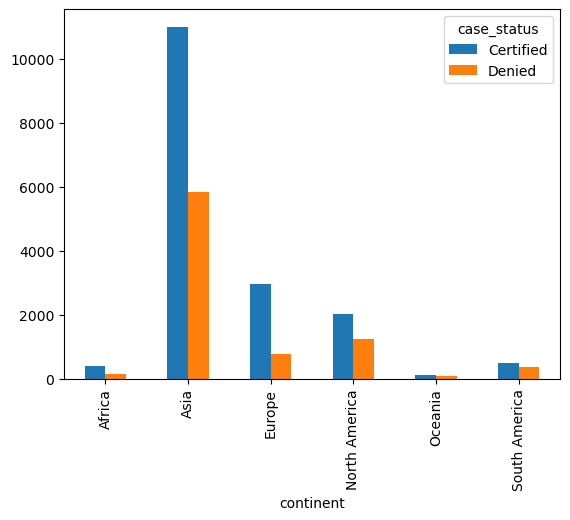

In [14]:
result1.plot(kind="bar")

<Axes: xlabel='case_status'>

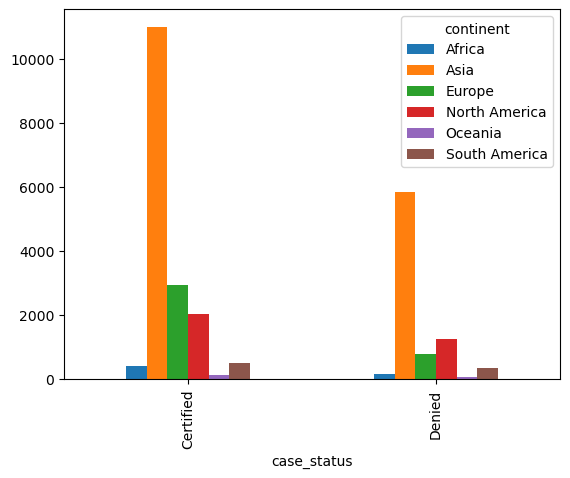

In [15]:
result2.plot(kind="bar")

In [16]:
col1 = visa_df['continent']
col2 = visa_df['education_of_employee']
col3 = visa_df['case_status']
col = [col1, col2]
result3 = pd.crosstab(col, col3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

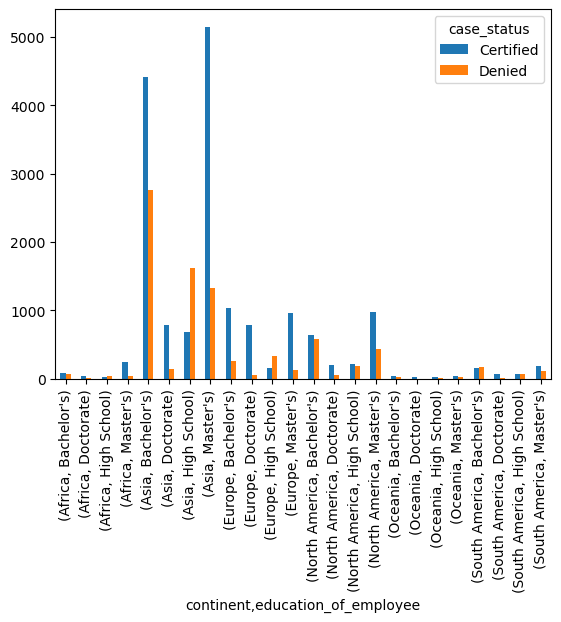

In [17]:
result3.plot(kind="bar")

In [18]:
col1 = visa_df['continent']
col2 = visa_df['education_of_employee']
col3 = visa_df['case_status']
col = [col2, col1]
result4 = pd.crosstab(col, col3)
result4

case_status                          Certified  Denied
education_of_employee continent                       
Bachelor's            Africa                81      62
                      Asia                4407    2761
                      Europe              1040     259
                      North America        641     584
                      Oceania               38      28
                      South America        160     173
Doctorate             Africa                43      11
                      Asia                 780     143
                      Europe               788      58
                      North America        207      51
                      Oceania               19       3
                      South America         75      14
High School           Africa                23      43
                      Asia                 676    1614
                      Europe               162     328
                      North America        210     191
                      Oceania               19      17
                      South America         74      63
Master's              Africa               250      38
                      Asia                5149    1331
                      Europe               967     130
                      North America        979     429
                      Oceania               46      22
                      South America        184     109

<Axes: xlabel='education_of_employee,continent'>

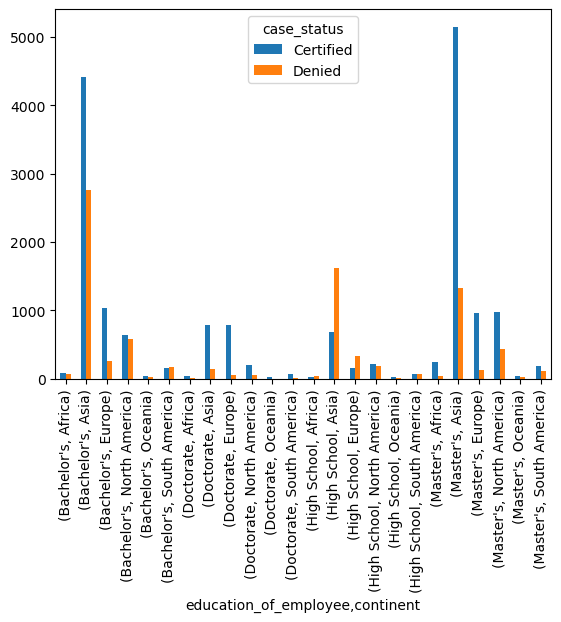

In [19]:
result4.plot(kind="bar")

**Numerical - Numerical**

- In order to plot numerical vs numerical we need to use scatter plot
- scatter plot will give the relation between two numerical columns
- It is under matplotlib library

$plt.scatter()$

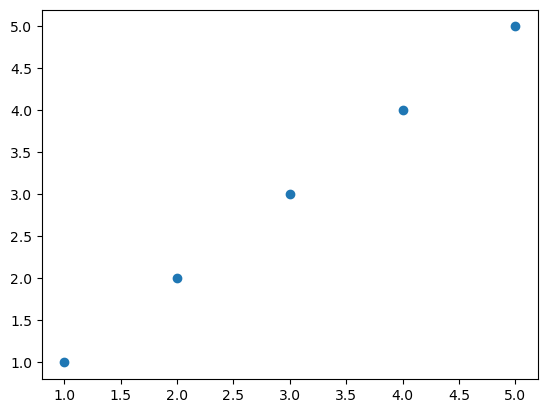

In [20]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# It is y = x plot
plt.scatter(x, y)
plt.show()

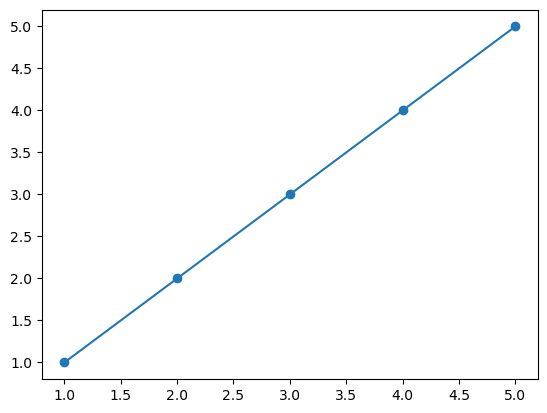

In [21]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
# It is y = x plot
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

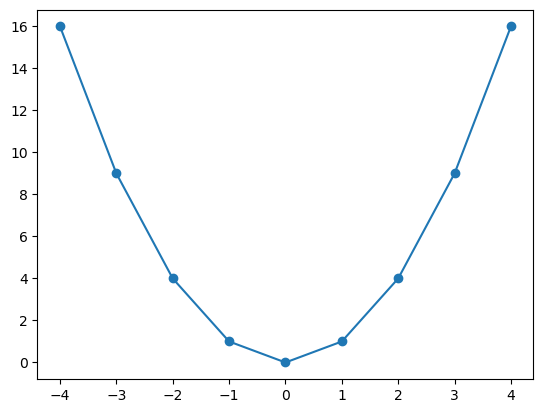

In [22]:
x = [i for i in range(-4, 5)]
y = [i*i for i in x]
# It is y = x^2 plot : It is a parabolla
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

In [23]:
visa_df.select_dtypes(exclude="object").columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Scatter plot - 1**

- no_of_employees and yr_of_estab

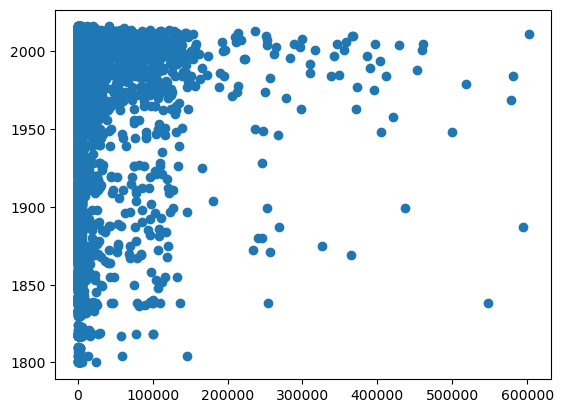

In [24]:
col1 = visa_df['no_of_employees']
col2 = visa_df['yr_of_estab']

plt.scatter(col1, col2)

**Observation: No relation in above two columns**

- Pearson correlation coefficient = 0

**Scatter plot - 2**
- no_of_employees and prevailing_wage

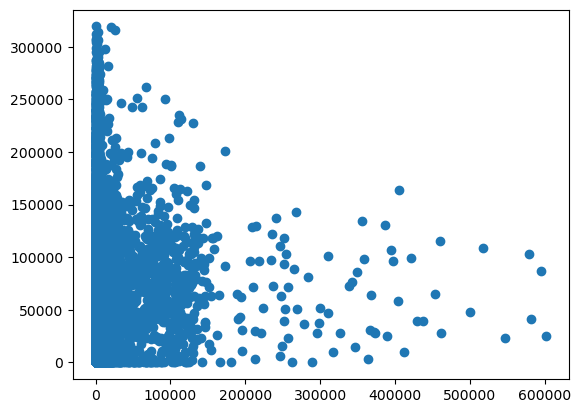

In [25]:
col1 = visa_df['no_of_employees']
col2 = visa_df['prevailing_wage']

plt.scatter(col1, col2)

**Observation: No relation in above two columns**

- Pearson correlation coefficient = 0

**Scatter plot - 3**

- yr_of_estab and prevailing_wage

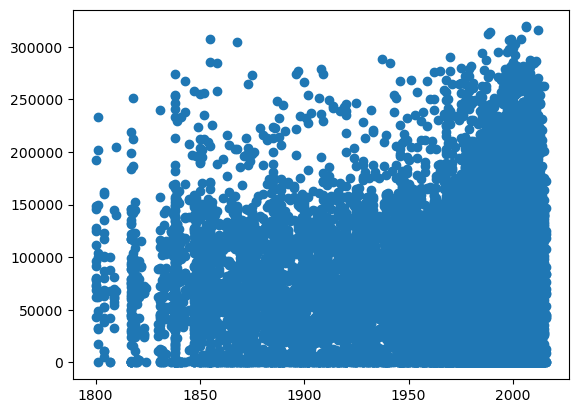

In [26]:
col1 = visa_df['yr_of_estab']
col2 = visa_df['prevailing_wage']

plt.scatter(col1, col2)

**Observation: No relation in above two columns**

- Pearson correlation coefficient = 0

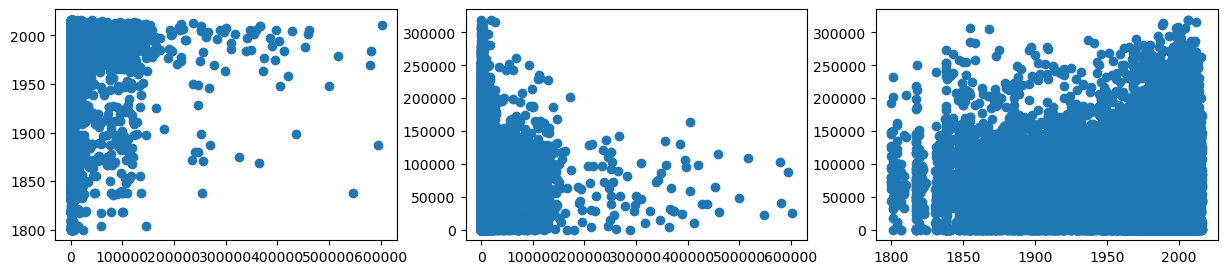

In [27]:
plt.figure(figsize=(15, 3))
col1 = visa_df['no_of_employees']
col2 = visa_df['yr_of_estab']
plt.subplot(1, 3, 1).scatter(col1, col2)

col1 = visa_df['no_of_employees']
col2 = visa_df['prevailing_wage']
plt.subplot(1, 3, 2).scatter(col1, col2)


col1 = visa_df['yr_of_estab']
col2 = visa_df['prevailing_wage']
plt.subplot(1, 3, 3).scatter(col1, col2)

**Pearson Correlation Coefficient**

<img src="https://qph.cf2.quoracdn.net/main-qimg-8b7cfb2dfcd459f25c9d7641aacc82ab-pjlq" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 602px; height: 250px; margin: 0px; width: 557px;" alt="What is the reasoning and meaning of the Pearson correlation coefficient?  How did that formula come to be? - Quora" jsname="kn3ccd" aria-hidden="false">

- Pearson correlation coefficient will give the amount of relation between variables
- It is denoted with r
- r varies from - 1 to 1
- for positive relation r varies from 0 to 1
- for negative relation r varies from -1 to 0
- for no relation r approximate equal to 0
- In python code we have corr() under pandas to find correlation
    - This will give covariance matrix
    - we already discussed covarriance matrix is rows and columns Type
    - In this data we have 3 numerical columns
    - so we will get 3\*3 that is 9 values
    - All trace of the matrix represents variance
    - Upper Triangle and Lower Triangle represents covarriance

In [28]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observations**
- Relation between no_of_employees and no_of_employees is 100%  hence var(x) = cov(x,x) = 1

- The correlation value between no_of_employees and yr_of_estab is approximately 0
    - which indicates no relation
- The correlation value between no_of_employees and prevailing_wage is approximately 0
    - which indicates no relation
- The correlation value between yr_of_estab and prevailing_wage is approximately 0
    - which indicates no relation

**What happens is correlation is high**

- for that we will read wine quality dataset
- will perform corr option

**Reading Wine Quality Dataset**

In [29]:
wine_data = pd.read_csv(r'C:\Users\LEGION\OneDrive\Documents\Naresh IT\Datafiles\winequality_red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
wine_data.drop_duplicates()
# If you see first row NAN
wine_data.iloc[1:, :] 
# indexes are not in the order
# you need to make indexes in order

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- If we apply correlation on 12 columns
- Matrix size will be 12 X 12 = 144

In [33]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**heat Map**

- heat map will provide the matrix representation of correlation value
- heat map represents values in color format
- different different values in different color
- beside matrix it will display color bar 
- color bar means like a scale of values with color
- it is available under seaborn paackage

<Axes: >

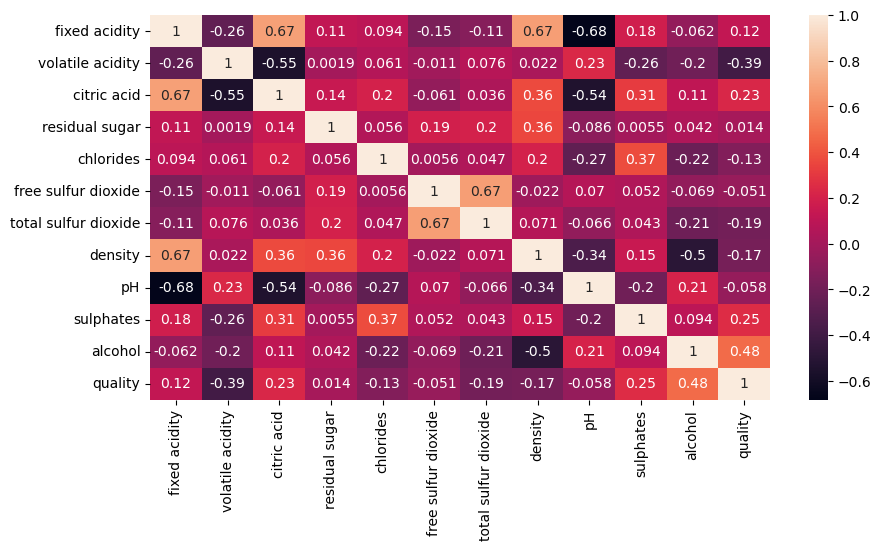

In [34]:
wine_corr = wine_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(wine_corr, annot=True)

<Axes: >

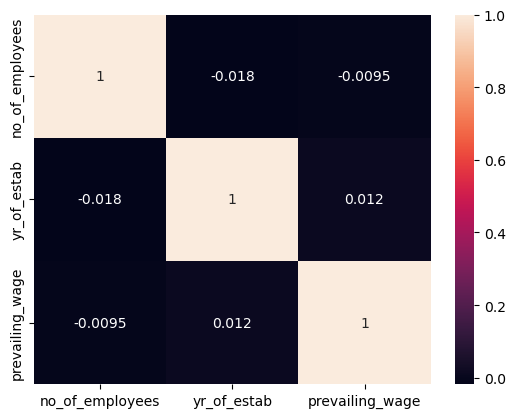

In [35]:
visa_numerical = visa_df.select_dtypes(exclude="object")
visa_corr = visa_numerical.corr()
sns.heatmap(visa_corr, annot=True)

<Axes: >

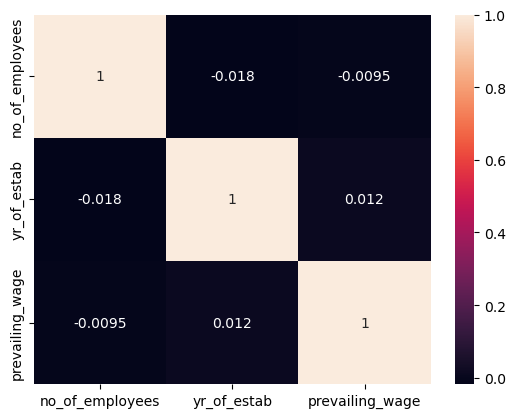

In [36]:
visa_corr = visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr, annot=True)

- Draw the scatter plot for wine data columns
- which are having highest positive correlation
- which are having highest negative correlation

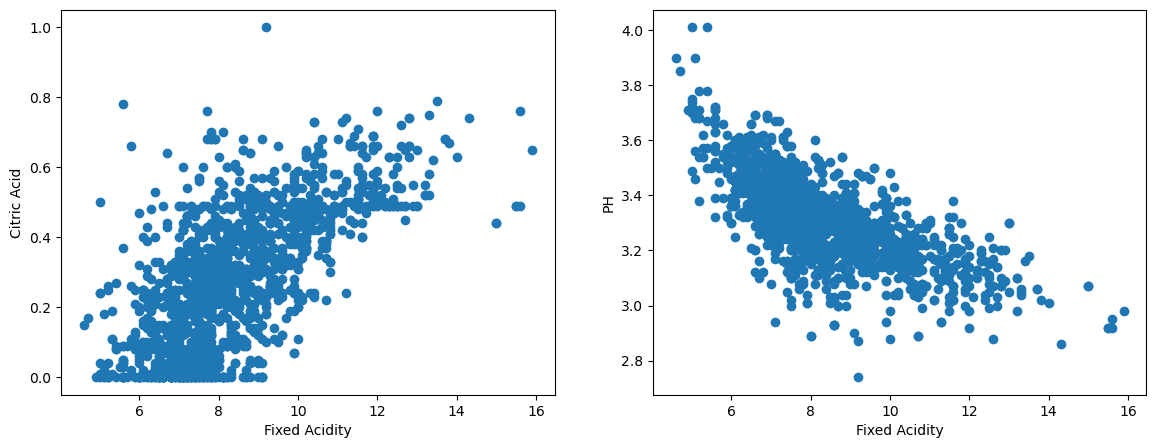

In [37]:
col1 = wine_data['fixed acidity']
col2 = wine_data['citric acid']
col3 = wine_data['pH']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1).scatter(col1, col2)
plt.xlabel("Fixed Acidity")
plt.ylabel("Citric Acid")
plt.subplot(1, 2, 2).scatter(col1, col3)
plt.xlabel("Fixed Acidity")
plt.ylabel("PH")
plt.show()